<a href="https://colab.research.google.com/github/Alexander0013/Github-Colab/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%89_LiangAlex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
n = 9487

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

1

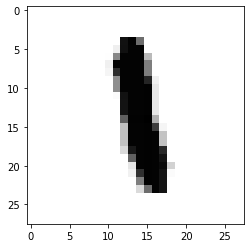

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(500, input_dim=784, activation='relu'))

每層神經元個數增加到500

In [ ]:
model.add(Dense(500, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [ ]:
model.compile(loss='MSE', optimizer=SGD(lr=0.1), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


變更loss function為平均絕對值誤差(Mean absolute error，MAE)
Learning rate變更為 0.1

#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0722 - accuracy: 0.5166
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.8245
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0212 - accuracy: 0.8805
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0175 - accuracy: 0.8952
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0157 - accuracy: 0.9044
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9098
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9150
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0129 - accuracy: 0.9190
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.9228
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9262

模型準確率提高到92%

### 6. step 3: 預測 (testing)

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

Tensorflow 2.6 把predict_classes移除了，只能用2.5之前的版本或是其他方式
例如 predictions = (model.predict(x_test) > 0.5).astype("int32")

神經網路預測是: [0 0 0 1 0 0 0 0 0 0]


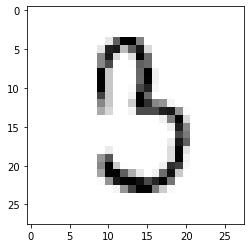

In [ ]:
n = 2280

print('神經網路預測是:', predictions[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [ ]:
model.save("my_nn.h5")